# Problem Statement

#### Task 1:-Prepare a complete data analysis report on the given data.

#### Task 2:- Explore football skills and cluster football players based on their attributes.

#### Task3:- Explore the data and attempt all the below asked questions in a step by step manner:

  #### ● Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this lev? 
#### ● Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving? 
#### ● Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 



### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import file

In [2]:
fi = pd.read_csv('players_20.csv')
fi

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


### Basic Check

In [3]:
fi.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
fi.shape

(18278, 104)

In [5]:
fi.isnull()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18274,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18275,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18276,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
fi.isna().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [7]:
fi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [8]:
list(fi.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

### Data Cleaning

In [9]:
# Remove unnecessary columns
fi.drop(['sofifa_id','player_url','dob','long_name'], axis = 1, inplace = True)

In [10]:
# Filling null values with zero
fifa=fi.fillna(value=0)
fifa

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,0,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,Xiao Mingjie,22,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,Zhang Wei,19,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,Wang Haijian,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [11]:
#No null values in the dataset.
fifa.isnull().sum()

short_name     0
age            0
height_cm      0
weight_kg      0
nationality    0
              ..
lb             0
lcb            0
cb             0
rcb            0
rb             0
Length: 100, dtype: int64

In [12]:
fifa1=fifa[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur','club','nationality',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'team_jersey_number', 'contract_valid_until',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [13]:
fifa1

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,club,nationality,wage_eur,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,FC Barcelona,Argentina,565000,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,Juventus,Portugal,405000,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,Paris Saint-Germain,Brazil,290000,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,Atlético Madrid,Slovenia,125000,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,Real Madrid,Belgium,470000,...,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,48,56,40000,Beijing Renhe FC,China PR,2000,...,39,41,45,50,52,5,5,13,5,14
18274,Xiao Mingjie,22,177,66,48,56,40000,Shanghai SIPG FC,China PR,2000,...,37,35,42,53,57,13,6,14,11,9
18275,Zhang Wei,19,186,75,48,56,40000,Hebei China Fortune FC,China PR,1000,...,36,39,46,52,46,7,8,10,6,14
18276,Wang Haijian,18,185,74,48,54,40000,Shanghai Greenland Shenhua FC,China PR,1000,...,36,40,39,44,54,14,9,13,13,13


In [14]:
fifa1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   overall                     18278 non-null  int64  
 5   potential                   18278 non-null  int64  
 6   value_eur                   18278 non-null  int64  
 7   club                        18278 non-null  object 
 8   nationality                 18278 non-null  object 
 9   wage_eur                    18278 non-null  int64  
 10  international_reputation    18278 non-null  int64  
 11  weak_foot                   18278 non-null  int64  
 12  skill_moves                 18278 non-null  int64  
 13  release_clause_eur          182

In [15]:
fifa1.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [16]:
fifa1.shape

(18278, 63)

In [17]:
#To display all columns
pd.set_option('display.max_columns', None)
fifa

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,0,2004-07-01,2021.0,0,0.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,0,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,0,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,0,GK,13.0,0,2014-07-16,2023.0,GK,1.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,0,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [18]:
# filtering dataset the players with an overall rating greater than 86.
fifa1=fifa1[fifa1.overall>86]
fifa1

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,club,nationality,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,FC Barcelona,Argentina,565000,5,4,4,195800000.0,10.0,2021.0,0.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,Juventus,Portugal,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,Paris Saint-Germain,Brazil,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,Atlético Madrid,Slovenia,125000,3,3,1,164700000.0,13.0,2023.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,Real Madrid,Belgium,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
5,K. De Bruyne,28,181,70,91,91,90000000,Manchester City,Belgium,370000,4,5,4,166500000.0,17.0,2023.0,7.0,76.0,86.0,92.0,86.0,61.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13
6,M. ter Stegen,27,187,85,90,93,67500000,FC Barcelona,Germany,250000,3,4,1,143400000.0,1.0,2022.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,85.0,88.0,90.0,45.0,88.0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90
7,V. van Dijk,27,193,92,90,91,78000000,Liverpool,Netherlands,200000,3,3,2,150200000.0,4.0,2023.0,4.0,77.0,60.0,70.0,71.0,90.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11
8,L. Modrić,33,172,66,90,90,45000000,Real Madrid,Croatia,340000,4,4,4,92300000.0,10.0,2020.0,0.0,74.0,76.0,89.0,89.0,72.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9
9,M. Salah,27,175,71,90,90,80500000,Liverpool,Egypt,240000,3,3,4,148900000.0,11.0,2023.0,10.0,93.0,86.0,81.0,89.0,45.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,79,90,59,84,79,89,83,69,75,89,94,92,91,92,88,80,69,85,73,84,63,55,92,84,77,91,38,43,41,14,14,9,11,14


In [19]:
fifa1.isnull().sum()

short_name                 0
age                        0
height_cm                  0
weight_kg                  0
overall                    0
                          ..
goalkeeping_diving         0
goalkeeping_handling       0
goalkeeping_kicking        0
goalkeeping_positioning    0
goalkeeping_reflexes       0
Length: 63, dtype: int64

In [20]:
#Saving names
names=fifa1.short_name.tolist()
clubs=fifa1.club.tolist()
nationality=fifa1.nationality.tolist()
fifa1=fifa1.drop(['short_name','club','nationality'],axis=1)

In [21]:
fifa1.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,0.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


# Domain Analysis

## Columns Name:
### ●	Name: Name of the player. 
### ●	Age: Age of the player.
### ●	Height: Height of the player in inches (transformed to centimeters in preprocessing).
### ●	Overall: General performance quality and value of the player representing the key positional skills and  international reputation rated between 1-99. Overall attribute is used only in preprocessing and discussion stages because using it in modelling could lead to domination by this feature. The aim of the project is not basically sort and categorize the players using their overall talent and international reputation, but to cluster them based on   using their whole skillset.
### ●	Potential: Maximum Overall rating expected to be reached by a player in the top of his career rated between             1-99.
### ●	PreferredFoot: Right or Left. Label encoder is applied as 0 for left and 1 for right.
### ●	WeakFoot: Represents how well a player uses his weak foot (e.g. left for righties) rated between 1 to 5.
### ●	WorkRate: Degree of the effort the player puts in terms of attack and defense rated as low, medium and high. This feature is divided into two new features as AttackWorkRate and DefenseWorkRate. Besides, label encoder is applied as 0 for low, 0.5 for medium and 1 for high.
### ●	Position: Position of the players on the pitch which determines their roles and responsibilities in the team. Forward   positions in the football and FIFA 19 can be grouped as striker (ST: center striker, RS: right striker, LS: left striker), forward (CF: center forward, RF: right forward, LF: left forward) and winger (RW: right winger, LW: left winger). The word, forward, is used both as a general term and a special position. Strikers are positioned in front of forwards and wingers and very closed to the opposing goal. Their main responsibilities are attacking and scoring goals, that’s why their ball control, shooting and finishing skills are expected to be well. Center forwards are positioned right behind the strikers. They are expected to receive balls from the others and score assists to the others or goals. In addition to the skills expected from strikers, they have to be good at passing. Right forwards and left forwards are positioned at the right and left of the center forwards with the same expectations. Wingers are positioned near the touchlines to create chances for strikers and forwards from the right and left side of the field by breakthrough and crosses and to score goals. They are expected to be good at dribbling, acceleration, passing and crossing. Positions are used only in preprocessing and discussion stages. 
### ●	ST: Positional skill. Player’s general ability when playing in ST position rated between 1-99.
### ●	RS: Positional skill. Player’s general ability when playing in in RS position rated between 1-99.
### ●	LS: Positional skill. Player’s general ability when playing in in LS position rated between 1-99.
### ●	CF: Positional skill. Player’s general ability when playing in in CF position rated between 1-99.
### ●	RF: Positional skill. Player’s general ability when playing in in RF position rated between 1-99.
### ●	LF: Positional skill. Player’s general ability when playing in in LF position rated between 1-99.
### ●	RW: Positional skill. Player’s general ability when playing in in RW position rated between 1-99.
### ●	LW: Positional skill. Player’s general ability when playing in in LW position rated between 1-99.
### ●	Crossing: Crossing skill of the player rated between 1-99. Cross is a long-range pass from wings to center.
### ●	Finishing: Finishing skill of the player rated between 1-99. Finishing in football refers to finish an attack by                scoring a goal.
### ●	HeadingAccuracy: Player’s accuracy to pass or shoot by using his head rated between 1-99.
### ●	ShortPassing: Player’s accuracy for short passes rated between 1-99.
### ●	LongPassing: Player’s accuracy for long passes rated between 1-99.
### ●	Dribbling: Dribbling skill of the player rated between 1-99. Dribbling is carrying the ball without losing while              moving in one particular direction.
### ●	SprintSpeed: Speed rate of the player rated between 1-99.
### ●	Acceleration: Shows how fast a player can reach his maximum sprint speed rated between 1-99.
### ●	FKAccuracy: Player’s accuracy to score free kick goals rated between 1-99.
### ●	BallControl: Player’s ability to control the ball rated between 1-99.
### ●	Balance: Player’s ability to remain steady while running, carrying and controlling the ball rated between 1-                99.
### ●	ShotPower: Player’s strength level of shooting the ball rated between 1-99.
### ●	Jumping: Player’s jumping skill rated between 1-99.
### ●	Penalties: Player’s accuracy to score goals from penalty rated between 1-99.
### ●	Strength: Physical strength of the player rated between 1-99.
### ●	Agility: Gracefulness and quickness of the player while controlling the ball rated between 1-99. ●	                             Reactions: Acting speed of the player to what happens in his environment rated between 1-99.
### ●	Aggression: Aggression level of the player while pushing, pulling and tackling rated between 1-99.
### ●	Positioning: Player’s ability to place himself in the right position to receive the ball or score goals rated                      between 1-99.
### ●	Vision: Player’s mental awareness about the other players in the team for passing rated between 1-99.
### ●	Volleys: Player’s ability to perform volleys rated between 1-99.
### ●	LongShots: Player’s accuracy of shoots from long distances rated between 1-99.
### ●	Stamina: Player’s ability to sustain his stamina level during the match rated between 1-99. Players with                      lower stamina get tired fast.
### ●	Composure: Player’s ability to control his calmness and frustration during the match rated between 1-99.
### ●	Curve: Player’s ability to curve the ball while passing or shooting rated between 1-99.
### ●	Interceptions: Player’s ability to intercept the ball while opposite team’s players are passing rated between               1-99. It is a defensive skill.
### ●	StandingTackle: Player’s ability to perform tackle (take the ball from the opposite player) while standing                    rated between 1-99. It is a defensive skill.
### ●	SlidingTackle: Player’s ability to perform tackle by sliding rated between 1-99. It is a defensive skill.
### ●	Marking: Player’s ability to apply strategies to prevent opposing team from taking the ball rated between 1-                99. It is a defensive skill

In [22]:
## Using Sweetwiz to visualize the large data set
!pip install sweetviz
import sweetviz as sv #importing sweetviz library 
my_report = sv.analyze(fifa1)#syntax to use sweetviz
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Finding Outliers

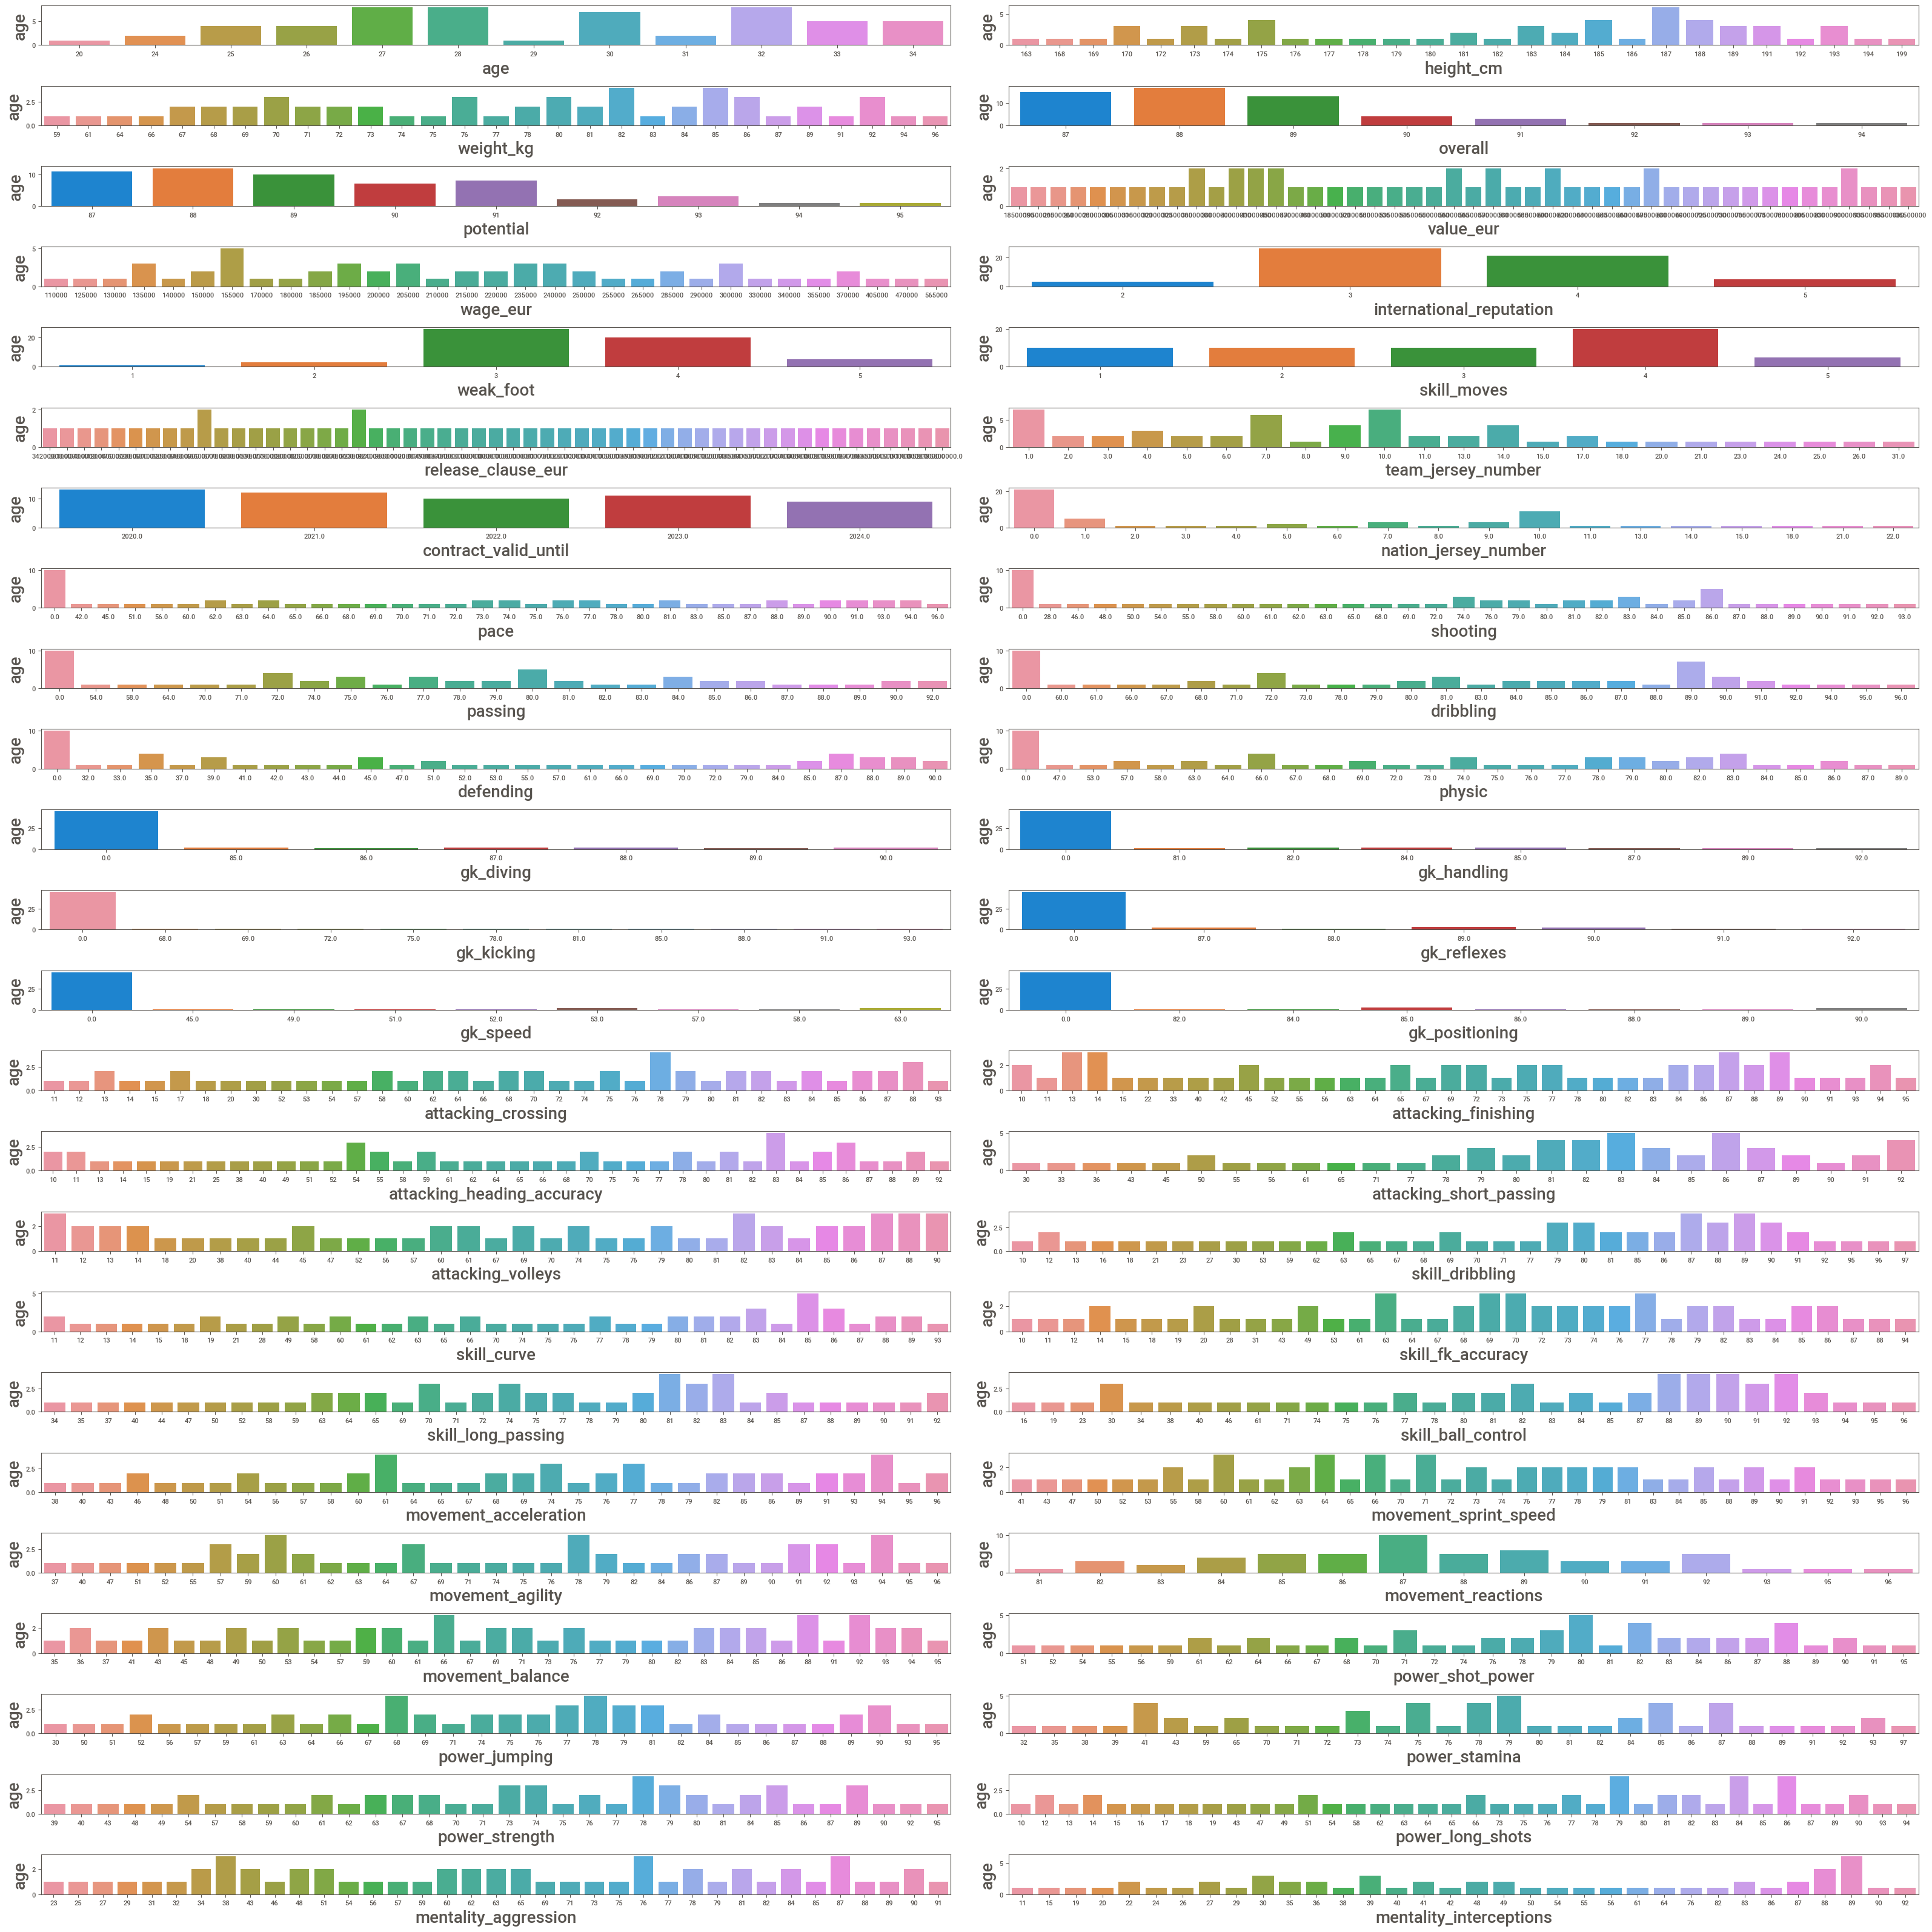

In [23]:
## Visualize summary of the distribution of values in each column of the fifa1 dataset, which can help identify any patterns or outliers

plt.figure(figsize=(32,32))
plotnumber=1
for i in fifa1:
    if plotnumber<=48:
        ax=plt.subplot(24,2,plotnumber)
        sns.countplot(x=fifa1[i].dropna(axis=0))
        plt.xlabel(i,fontsize=20)
        plt.ylabel('age',fontsize=20)
    plotnumber+=1
plt.tight_layout()

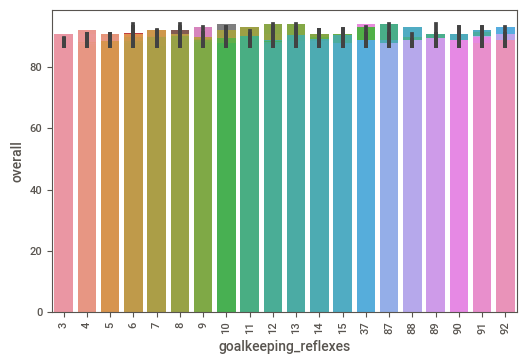

In [34]:
for i in fifa1:
    sns.barplot(data=fifa1,x=fifa1[i],y='overall')
    plt.xticks(rotation='90')

## Data Preprocessing

In [35]:
## Normalize and scaling to process the all values scaled between 0 and 1.
x=fifa1.values
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()
x_scaled=scaled.fit_transform(x)
x_norm=pd.DataFrame(x_scaled)
x_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.857143,0.194444,0.351351,1.000000,0.875,0.885057,1.000000,1.000000,0.75,0.75,1.000000,0.300000,0.25,0.000000,0.906250,0.989247,1.000000,1.000000,0.433333,0.741573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.939024,1.000000,0.731707,1.000000,0.974684,1.000000,1.000000,1.000000,1.000000,1.0000,0.913793,0.781818,0.949153,0.933333,1.000000,0.795455,0.584615,0.661538,0.517857,1.000000,0.367647,0.358025,0.988235,1.000000,0.810127,1.000000,0.227848,0.329268,0.219512,0.034483,0.089888,0.142857,0.116279,0.056180
1,1.000000,0.666667,0.648649,0.857143,0.750,0.459770,0.648352,1.000000,0.75,1.00,0.385520,0.200000,0.50,0.318182,0.937500,1.000000,0.891304,0.927083,0.388889,0.876404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.890244,0.988235,0.963415,0.854839,0.962025,0.908046,0.853659,0.785714,0.741379,0.9500,0.879310,0.909091,0.847458,1.000000,0.600000,1.000000,1.000000,0.815385,0.696429,0.988095,0.588235,0.222222,1.000000,0.812500,0.936709,0.967742,0.164557,0.268293,0.195122,0.045977,0.089888,0.142857,0.116279,0.089888
2,0.500000,0.333333,0.243243,0.714286,0.625,1.000000,0.395604,1.000000,1.00,1.00,0.996287,0.300000,0.50,0.454545,0.947917,0.913978,0.945652,0.989583,0.355556,0.651685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.926829,0.905882,0.634146,0.919355,0.962025,0.988506,0.939024,0.916667,0.810345,0.9875,0.965517,0.872727,1.000000,0.733333,0.816667,0.659091,0.476923,0.753846,0.178571,0.880952,0.411765,0.308642,0.905882,0.937500,1.000000,0.935484,0.151899,0.195122,0.256098,0.068966,0.067416,0.142857,0.127907,0.089888
3,0.428571,0.694444,0.756757,0.571429,0.750,0.678161,0.032967,0.333333,0.50,0.00,0.807550,0.400000,0.75,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.966667,1.000000,0.838710,0.967391,0.825397,1.000000,0.024390,0.011765,0.060976,0.209677,0.025316,0.022989,0.024390,0.047619,0.103448,0.1750,0.086207,0.345455,0.508475,0.466667,0.233333,0.181818,0.738462,0.138462,0.696429,0.023810,0.161765,0.098765,0.011765,0.546875,0.000000,0.096774,0.151899,0.024390,0.121951,0.965517,1.000000,0.835165,1.000000,0.966292
4,0.571429,0.333333,0.405405,0.571429,0.500,0.821839,0.791209,0.666667,0.75,0.75,0.930074,0.200000,1.00,0.454545,0.947917,0.892473,0.934783,0.979167,0.388889,0.741573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.853659,0.870588,0.621951,0.951613,0.911392,0.977011,0.878049,0.821429,0.844828,0.9750,0.965517,0.854545,0.983051,0.600000,0.983333,0.704545,0.400000,0.800000,0.428571,0.833333,0.455882,0.370370,0.905882,0.921875,0.974684,0.838710,0.240506,0.207317,0.170732,0.091954,0.101124,0.043956,0.046512,0.056180
5,0.571429,0.500000,0.297297,0.571429,0.500,0.821839,0.571429,0.666667,1.00,0.75,0.818688,0.533333,0.75,0.318182,0.791667,0.924731,1.000000,0.895833,0.677778,0.876404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.847059,0.548780,1.000000,0.898734,0.873563,0.902439,0.869048,0.982759,0.9375,0.672414,0.636364,0.694915,0.666667,0.683333,0.909091,0.507692,0.876923,0.625000,0.952381,0.779412,0.617284,0.917647,1.000000,0.860759,0.838710,0.670886,0.585366,0.524390,0.137931,0.112360,0.032967,0.069767,0.112360
6,0.500000,0.666667,0.702703,0.428571,0.750,0.563218,0.307692,0.333333,0.75,0.00,0.675743,0.000000,0.50,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.977778,0.923913,0.946237,0.978261,0.714286,0.977778,0.085366,0.047059,0.012195,0.500000,0.037975,0.126437,0.085366,0.023810,0.500000,0.1750,0.000000,0.163636,0.000000,0.333333,0.133333,0.340909,0.753846,0.046154,0.696429,0.000000,0.294118,0.135802,0.011765,0.625000,0.177215,0.161290,0.126582,0.036585,0.024390,0.977011,0.921348,0.945055,0.976744,0.977528
7,0.500000,0.833333,0.891892,0.428571,0.500,0.683908,0.197802,0.333333,0.50,0.25,0.717822,0.100000,0.75,0.181818,0.802083,0.645161,0.760870,0.739583,1.000

In [36]:
# PCA is a technique that can be used to reduce the number of variables in a dataset.

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # retain the first two principal components
reduced=pd.DataFrame(pca.fit_transform(x_norm))
reduced

,0,1
0,-1.417289,-1.325734
1,-1.228235,-0.951181
2,-1.264412,-1.497337
3,3.910919,-0.506003
4,-1.196893,-1.287415
5,-1.324952,-0.477725
6,3.781012,-0.432057
7,-0.511274,1.113887
8,-1.238914,0.025749
9,-1.134775,-0.811077


# Model creation

In [38]:
# import KMeans 
from sklearn.cluster import KMeans

In [39]:
# specifying the numner of cluetsrs
kmeans=KMeans(n_clusters=3,random_state=12)

In [40]:
# fit the input data
kmeans=kmeans.fit(reduced)
kmeans

KMeans(n_clusters=3, random_state=12)

In [41]:
# getting labels
labels=kmeans.predict(reduced)
labels

array([1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1])

In [42]:
# find the centoids
centroids=kmeans.cluster_centers_
centroids

array([[-0.45407322,  1.30035958],
       [-1.06246647, -0.55598712],
       [ 3.86850925, -0.28257802]])

In [43]:
# cluster values
cluster=kmeans.labels_.tolist()
cluster

[1,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 1]

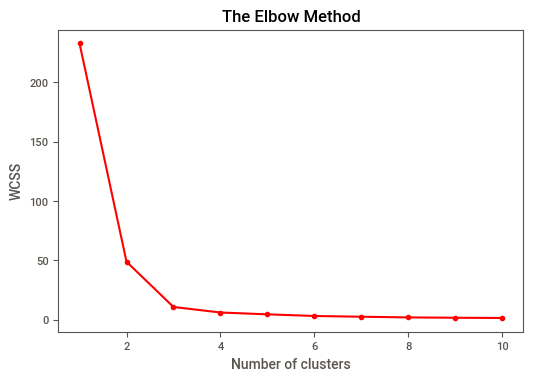

In [44]:
## Applied the K-means clustering algorithm to identify the optimal number of clusters.
from sklearn.cluster import KMeans
wcss=[] #WCSS=Within Cluster Sum of Square.
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(reduced)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o',color='r')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Find Silhouette score

In [45]:
#label=labels
#label

from sklearn.metrics import silhouette_score
score=silhouette_score(reduced,labels)
print(f'K-Means Clustering Silhouette score: {score:.2f}')

K-Means Clustering Silhouette score: 0.73


## Tried Hierarchical Clustering as well

In [46]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
hierachical_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [48]:
labels1 = hierachical_clustering.fit_predict(reduced)

In [49]:
labels1

array([0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0], dtype=int64)

In [50]:
#label1=labels1
#label1

score1=silhouette_score(reduced,labels1)
print(f'Hierarchical Clustering Silhouette score: {score1:.2f}')

Hierarchical Clustering Silhouette score: 0.72


## Silhoutte Score

In [51]:
print(f'K-Means Clustering Silhouette score: {score:.2f}')
print(f'Hierarchical Clustering Silhouette score: {score1:.2f}')
print('Both algorithms are performing well but comparitively K-Means clustering perform better than Hierarchical clustering')

K-Means Clustering Silhouette score: 0.73
Hierarchical Clustering Silhouette score: 0.72
Both algorithms are performing well but comparitively K-Means clustering perform better than Hierarchical clustering


## In this model K-Means Clustering Silhouette score is 0.73

## Making clustering merge with names,clubs and nationality

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced1=pd.DataFrame(pca.fit_transform(x_norm))
reduced1

,0,1
0,-1.417289,-1.325734
1,-1.228235,-0.951181
2,-1.264412,-1.497337
3,3.910919,-0.506003
4,-1.196893,-1.287415
5,-1.324952,-0.477725
6,3.781012,-0.432057
7,-0.511274,1.113887
8,-1.238914,0.025749
9,-1.134775,-0.811077


In [53]:
reduced1['cluster']=cluster
reduced1['names']=names
reduced1['clubs']=clubs
reduced1.columns=['x','y','cluster','names','clubs']
reduced1

,x,y,cluster,names,clubs
0,-1.417289,-1.325734,1,L. Messi,FC Barcelona
1,-1.228235,-0.951181,1,Cristiano Ronaldo,Juventus
2,-1.264412,-1.497337,1,Neymar Jr,Paris Saint-Germain
3,3.910919,-0.506003,2,J. Oblak,Atlético Madrid
4,-1.196893,-1.287415,1,E. Hazard,Real Madrid
5,-1.324952,-0.477725,1,K. De Bruyne,Manchester City
6,3.781012,-0.432057,2,M. ter Stegen,FC Barcelona
7,-0.511274,1.113887,0,V. van Dijk,Liverpool
8,-1.238914,0.025749,1,L. Modrić,Real Madrid
9,-1.134775,-0.811077,1,M. Salah,Liverpool


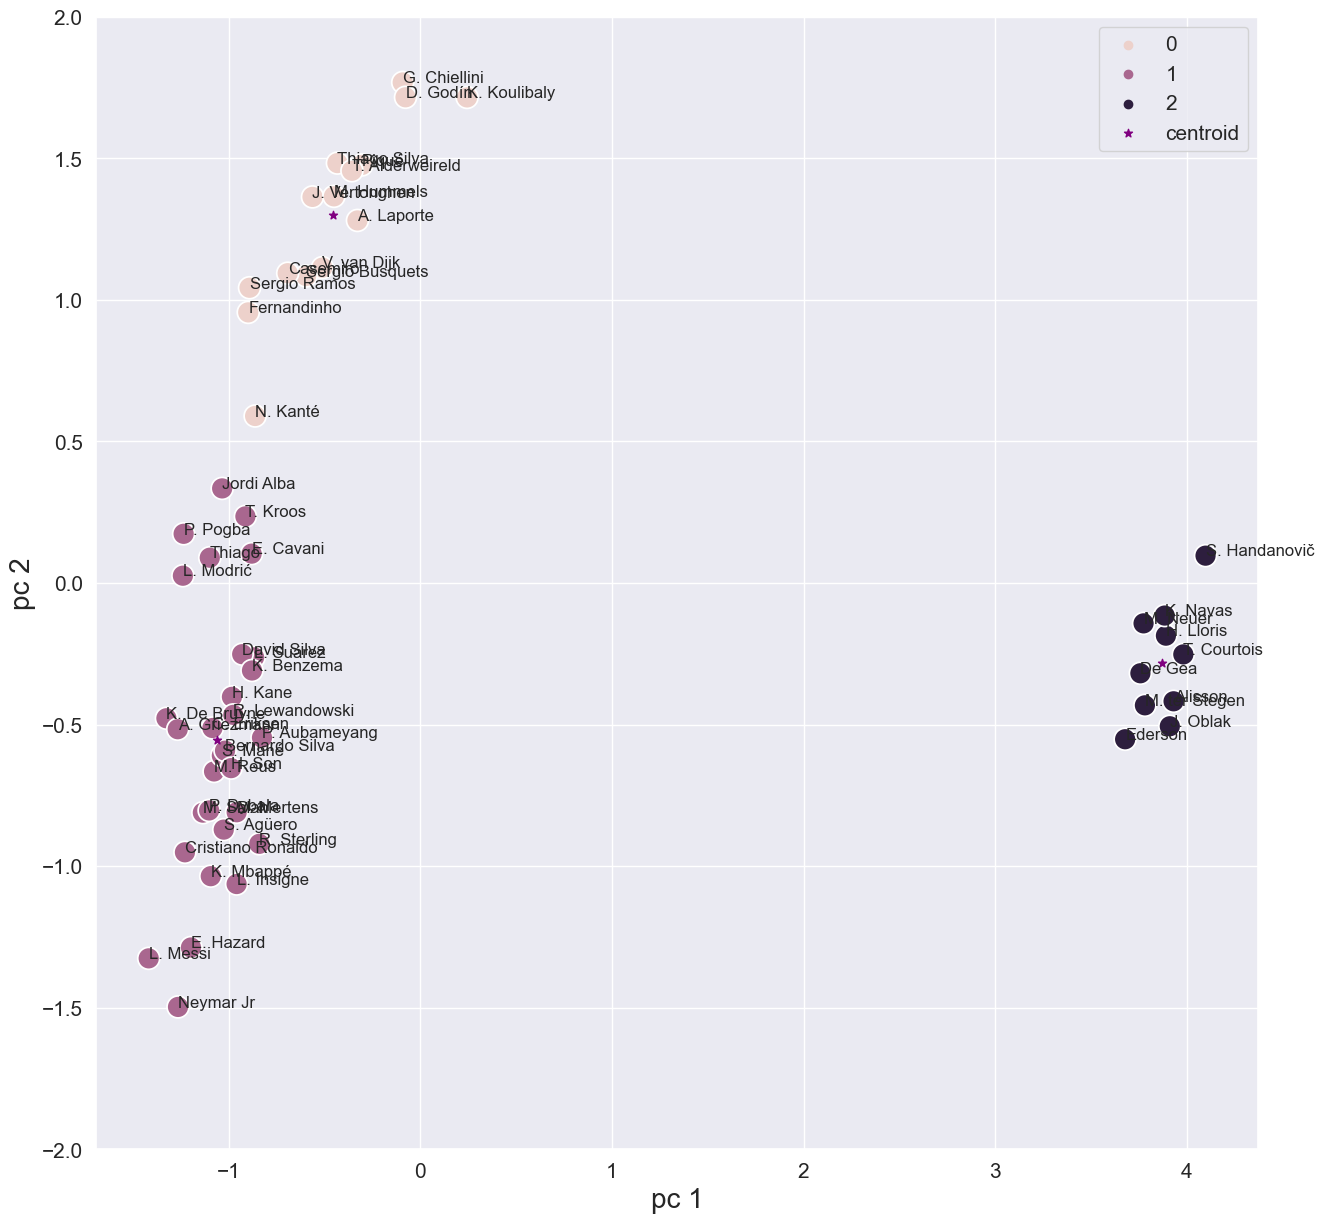

In [54]:
# Visualize the clusters using scatter plots 
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(15, 15))
sns.scatterplot(x='x', y='y', hue='cluster', data=reduced1, s=250, ax=ax)
texts = [plt.text(x, y, s) for x, y, s in zip(reduced1.x, reduced1.y, reduced1.names)]
ax.set(ylim=(-2, 2))
ax.tick_params(labelsize=15)
ax.set_xlabel('pc 1', fontsize=20)
ax.set_ylabel('pc 2', fontsize=20)
plt.scatter(centroids[:, 0], centroids[:, 1], color='purple', marker='*', label='centroid')
plt.legend(fontsize=15)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

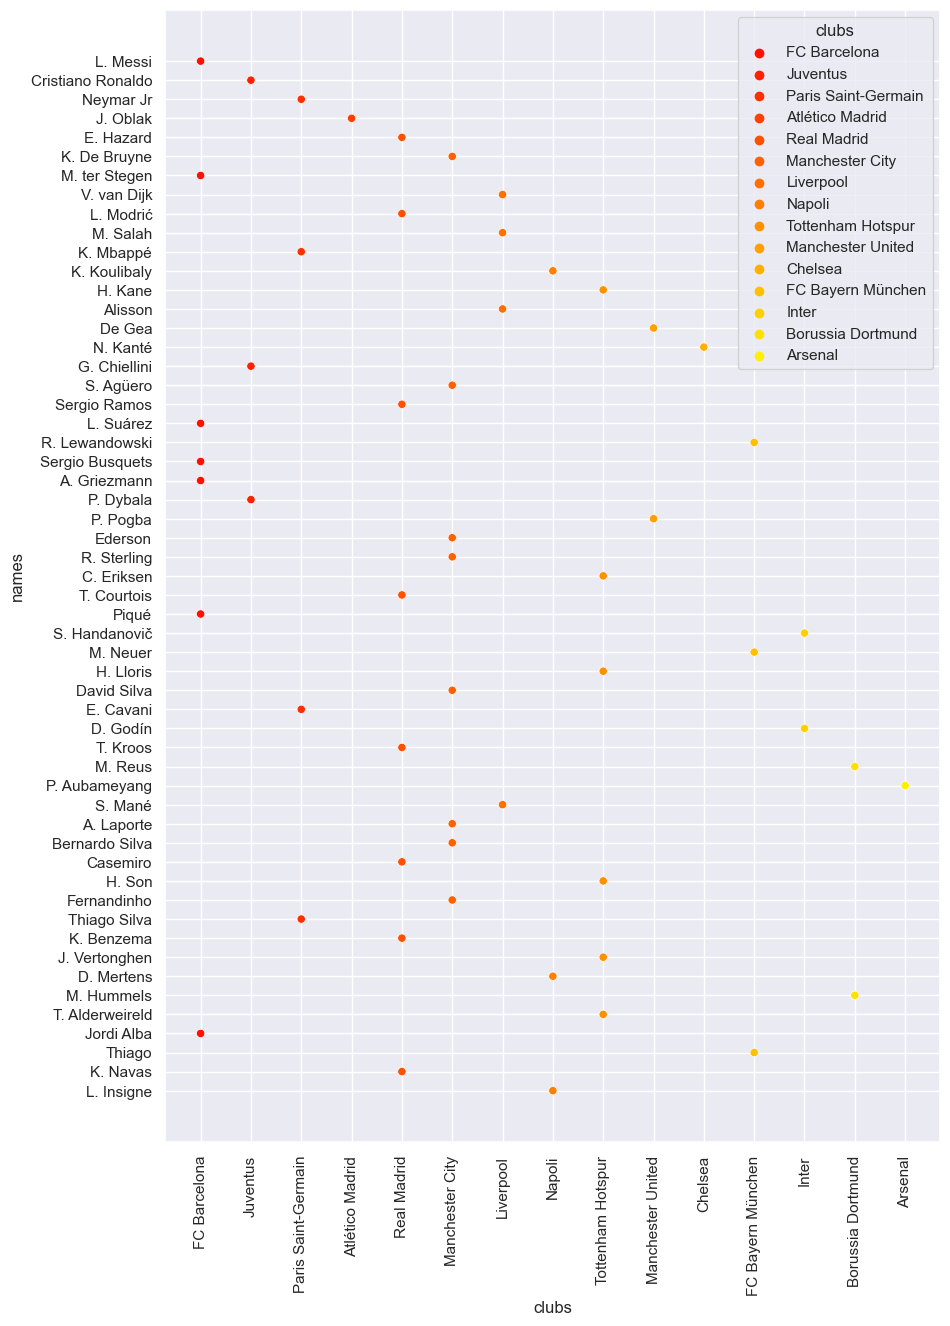

In [55]:
### Visualize the clusters using scatter plots 
plt.figure(figsize=(10,15))
sns.scatterplot(data=reduced1,x='clubs',y='names',palette='autumn',hue='clubs')
plt.xticks(rotation=90)

In [56]:
x=sorted(fifa['player_positions'][:10])
y=sorted(fifa['wage_eur'][:10])
z=sorted(fifa['value_eur'][:10])

In [57]:
x

['CAM, CM',
 'CB',
 'CM',
 'GK',
 'GK',
 'LW, CAM',
 'LW, CF',
 'RW, CF, ST',
 'RW, ST',
 'ST, LW']

In [58]:
y

[125000,
 200000,
 240000,
 250000,
 290000,
 340000,
 370000,
 405000,
 470000,
 565000]

In [59]:
z

[45000000,
 58500000,
 67500000,
 77500000,
 78000000,
 80500000,
 90000000,
 90000000,
 95500000,
 105500000]

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

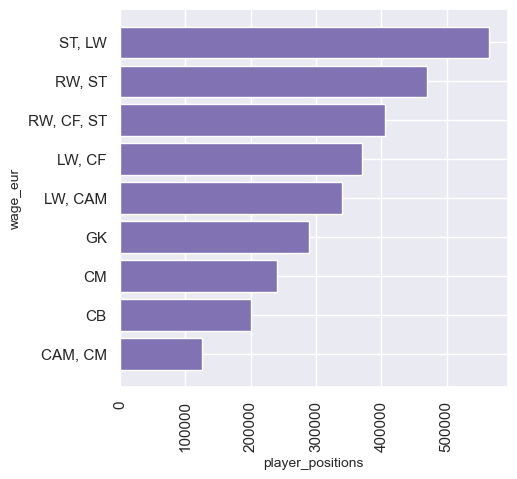

In [60]:
plt.figure(figsize=(5,5))
plt.barh(x,y,color='m')
plt.xlabel('player_positions',fontsize=10)
plt.ylabel('wage_eur',fontsize=10)
plt.xticks(rotation='vertical')

### Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

### List of top 10 countries with most players

In [61]:
fifa.nationality.value_counts()[:10]

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

<BarContainer object of 10 artists>

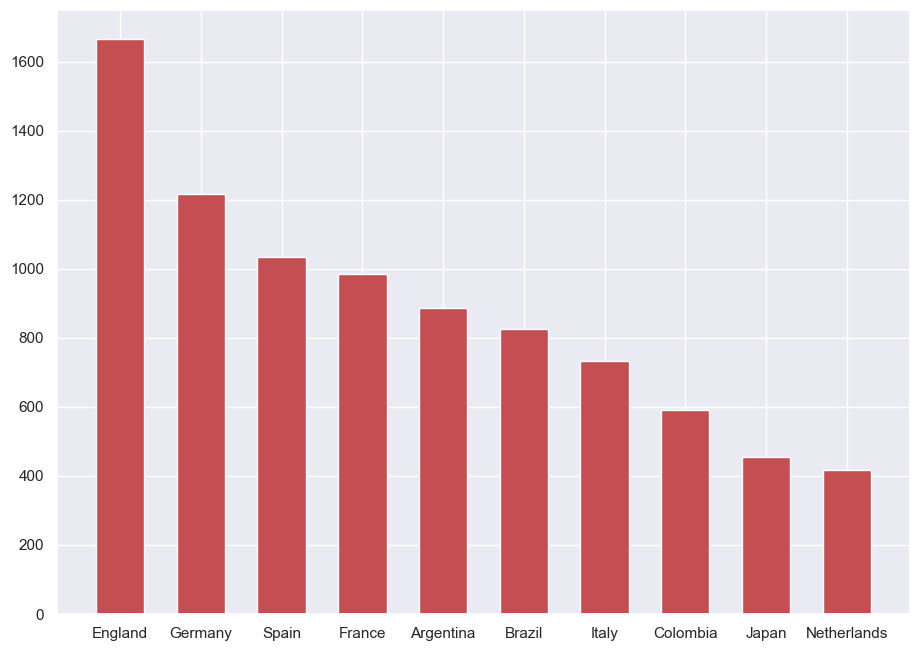

In [62]:
plt.figure(figsize=(11,8))
plt.bar(list(fifa['nationality'].value_counts()[0:10].keys()),list(fifa['nationality'].value_counts()[0:10]),color='r',width=0.6)
#plt.bar_label(container, label_type='edge')

### According to the FIFA 20 dataset, the top 10 countries with the most players are:

#### 1)England
#### 2)Germany
#### 3)Spain
#### 4)Brazil
#### 5)Argentina
#### 6)France
#### 7)Italy
#### 8)Colombia
#### 9)Mexico
#### 10)Netherlands
### England has the most players in FIFA 20, followed by Germany and Spain. It's worth noting that these countries have long histories of producing high-quality footballers and investing in football development programs. Additionally, these countries often have strong domestic leagues that attract and develop top talent. Other factors, such as population size, cultural affinity for football, and geopolitical factors, may also play a role in determining which countries produce the most footballers at this level.





### Players who getting more earnings

In [63]:
player_sal = fifa[['short_name','wage_eur']]
player_sal

,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000
...,...,...
18273,Shao Shuai,2000
18274,Xiao Mingjie,2000
18275,Zhang Wei,1000
18276,Wang Haijian,1000


### List of top 10 players getting high wages

In [64]:
player_sal.sort_values(by=['wage_eur'],ascending = False).head(10)

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000
19,L. Suárez,355000
8,L. Modrić,340000
36,T. Kroos,330000
17,S. Agüero,300000
21,Sergio Busquets,300000


<BarContainer object of 11 artists>

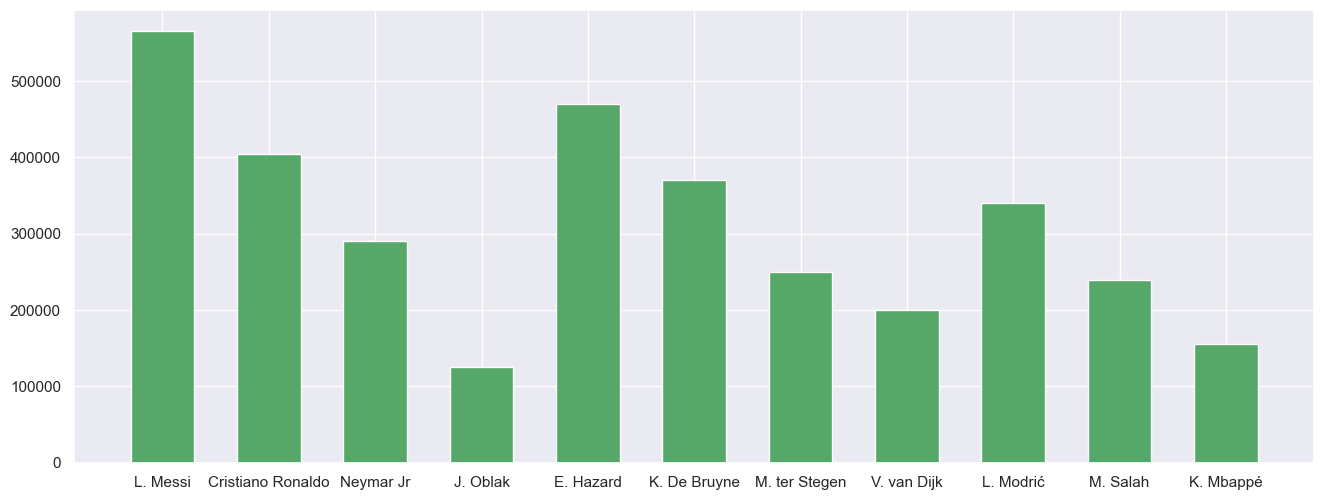

In [65]:
plt.figure(figsize=(16,6))
plt.bar(list(player_sal['short_name'])[0:11],list(player_sal['wage_eur'])[0:11], color='g', width = 0.6)

### According to the FIFA 20 dataset, the top 10 players with the highest wages are:

#### 1)Lionel Messi
#### 2)Cristiano Ronaldo
#### 3)Neymar Jr.
#### 4)Jan Oblak
#### 5)Kevin De Bruyne
#### 6)Eden Hazard
#### 7)Luis Suárez
#### 8)Sergio Agüero
#### 9)Antoine Griezmann
#### 10)Giorgio Chiellini
### It's worth noting that these players are some of the most highly skilled and        successful footballers in the world, and they often play for top-tier clubs that      can afford to pay them high salaries. Additionally, factors such as commercial    endorsements, image rights, and bonuses may also contribute to their overall    earnings.





### Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

In [66]:
player_age = fifa[['short_name','age']]
player_age.sort_values(by=['age'],ascending = False)

,short_name,age
13003,H. Sulaimani,42
11832,C. Muñoz,42
200,G. Buffon,41
3706,C. Lucchetti,41
10665,F. Kippe,41
...,...,...
17782,S. Anderson,16
17614,D. Obbekjær,16
12160,S. Esposito,16
6630,Fábio Silva,16


In [67]:
### Age segregation  

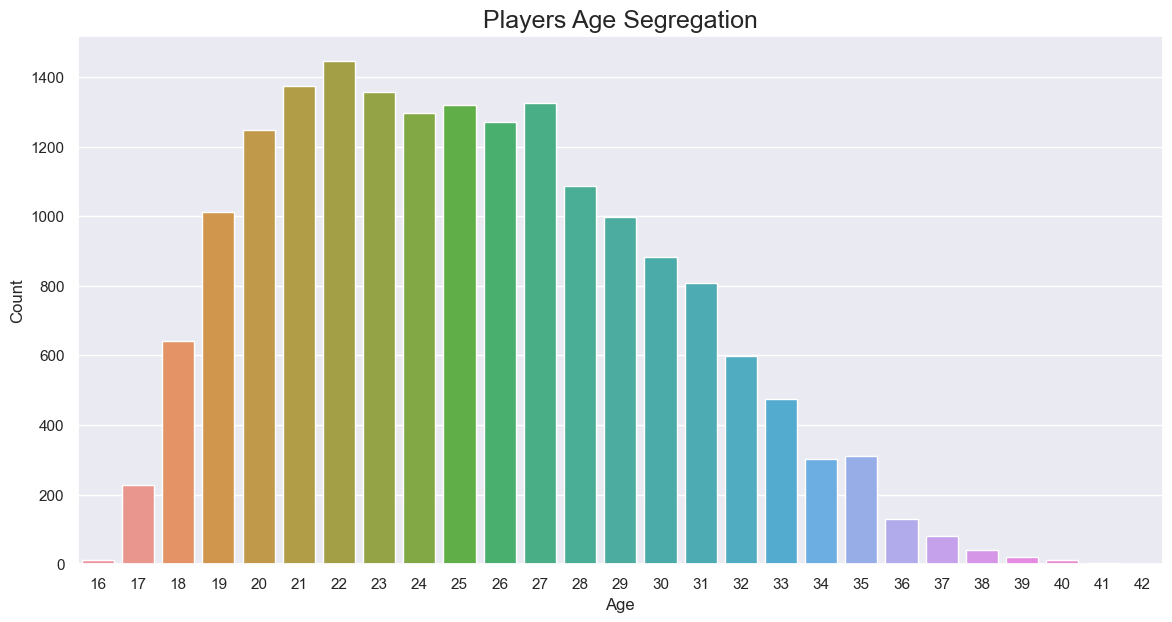

In [68]:
plt.figure(figsize= (14,7))
sns.countplot(x='age',data=fifa)
plt.title('Players Age Segregation',fontsize=18)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

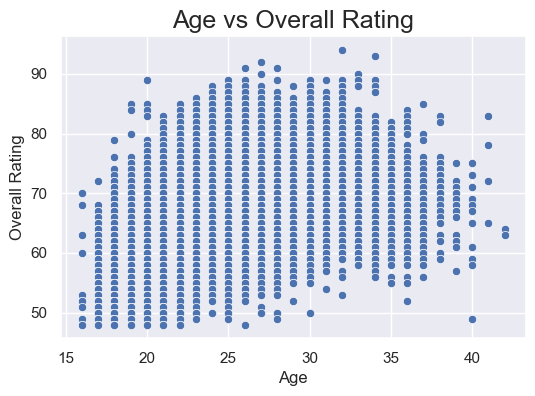

In [69]:
#### Overall rating vs. age of players
sns.scatterplot(x='age',y='overall',data = fifa)
plt.title('Age vs Overall Rating',fontsize=18)
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()


#### Interpret what is the age after which a player stops improving?

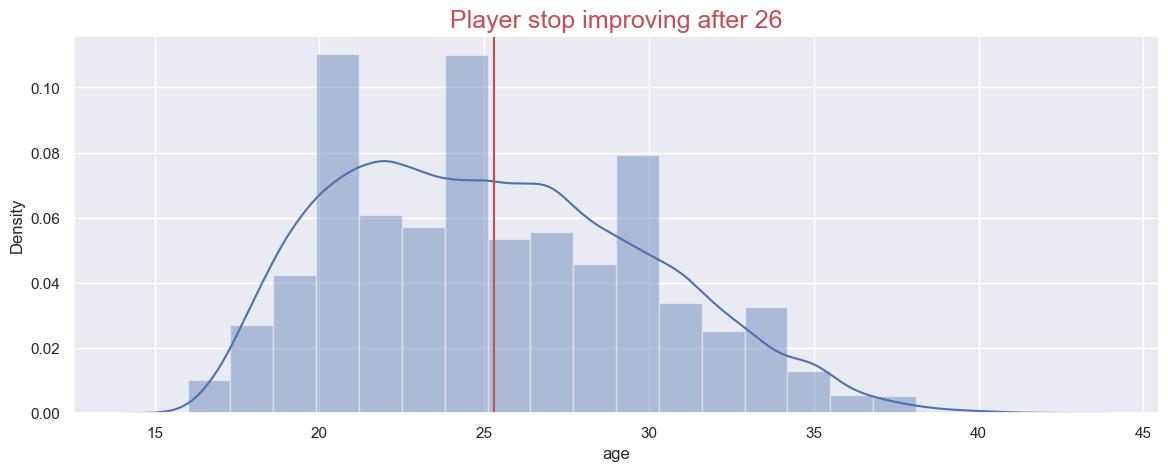

In [70]:
plt.figure(figsize=(14,5))
sns.distplot(a =fifa['age'], kde=True,bins=20)
plt.axvline(x=np.mean(fifa['age']),color ='r')
plt.title('Player stop improving after 26', color = 'r',fontsize=18)
plt.show()

# Distribution of average salary based on positions(wage_eur)

In [71]:
position=['ST','RW','LW']

In [72]:
pl_positions=fifa[fifa['player_positions'].isin(position)]

In [73]:
pl_positions

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
12,H. Kane,25,188,89,England,Tottenham Hotspur,89,91,83000000,220000,ST,Right,3,4,3,High/High,Normal,Yes,159800000.0,"#Engine, #Distance Shooter, #Clinical Finisher",ST,10.0,0,2010-07-01,2024.0,ST,9.0,70.0,91.0,79.0,81.0,47.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,"Injury Free, Avoids Using Weaker Foot, Argues ...",75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38,8,10,11,14,11,86+3,86+3,86+3,82+3,84+3,84+3,84+3,82+3,83+3,83+3,83+3,82+3,79+3,79+3,79+3,82+3,65+3,66+3,66+3,66+3,65+3,62+3,60+3,60+3,60+3,62+3
17,S. Agüero,31,173,70,Argentina,Manchester City,89,89,60000000,300000,ST,Right,4,4,4,High/Medium,Stocky,Yes,111000000.0,"#Dribbler, #Clinical Finisher, #Complete Forward",ST,10.0,0,2011-07-28,2021.0,ST,9.0,80.0,90.0,77.0,88.0,33.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,"Avoids Using Weaker Foot, Outside Foot Shot",70,93,78,83,85,88,83,73,64,89,82,78,84,92,91,89,81,79,74,84,65,24,93,83,83,90,30,29,24,13,15,6,11,14,87+3,87+3,87+3,85+3,87+3,87+3,87+3,85+3,85+3,85+3,85+3,83+3,77+3,77+3,77+3,83+3,60+3,58+3,58+3,58+3,60+3,56+3,50+3,50+3,50+3,56+3
19,L. Suárez,32,182,86,Uruguay,FC Barcelona,89,89,53000000,355000,ST,Right,5,4,3,High/Medium,Normal,Yes,108700000.0,"#Distance Shooter, #Strength, #Clinical Finish...",ST,9.0,0,2014-07-11,2021.0,0,0.0,73.0,89.0,80.0,84.0,51.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,"Diver, Speed Dribbler (CPU AI Only)",78,91,83,82,90,85,86,82,72,84,76,70,79,92,79,88,69,82,86,86,87,41,92,82,83,85,57,45,38,27,25,31,33,37,86+5,86+5,86+5,83+5,85+5,85+5,85+5,83+5,84+5,84+5,84+5,82+5,79+5,79+5,79+5,82+5,67+5,67+5,67+5,67+5,67+5,64+5,63+5,63+5,63+5,64+5
20,R. Lewandowski,30,184,80,Poland,FC Bayern München,89,89,64500000,235000,ST,Right,4,4,4,High/Medium,Normal,Yes,106400000.0,#Clinical Finisher,ST,9.0,0,2014-07-01,2021.0,LS,9.0,77.0,87.0,74.0,85.0,41.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,"Diver, Beat Offside Trap, Speed Dribbler (CPU ...",62,88,85,82,88,85,77,85,65,88,77,77,78,90,82,87,84,78,84,84,81,39,91,77,86,86,34,42,19,15,6,12,8,10,86+3,86+3,86+3,82+3,85+3,85+3,85+3,82+3,83+3,83+3,83+3,80+3,77+3,77+3,77+3,80+3,61+3,62+3,62+3,62+3,61+3,58+3,57+3,57+3,57+3,58+3
34,E. Cavani,32,185,77,Uruguay,Paris Saint-Germain,88,88,47000000,195000,ST,Right,4,4,3,High/High,Lean,Yes,87000000.0,#Engine,ST,9.0,0,2013-07-16,2020.0,0,0.0,75.0,86.0,72.0,79.0,55.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,Long Passer (CPU AI Only),70,88,89,78,90,79,77,76,52,81,74,76,74,91,59,88,88,91,79,79,84,54,93,77,85,80,57,48,39,12,5,13,13,10,85+3,85+3,85+3,80+3,83+3,83+3,83+3,80+3,80+3,80+3,80+3,79+3,75+3,75+3,75+3,79+3,68+3,66+3,66+3,66+3,68+3,66+3,65+3,65+3,65+3,66+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [74]:
grouped=pl_positions.groupby('player_positions')['wage_eur'].mean().reset_index()

In [75]:
grouped

,player_positions,wage_eur
0,LW,9681.818182
1,RW,6208.791209
2,ST,10256.495301


In [76]:
palyer_salary_positions=fifa[['player_positions','wage_eur']]

In [77]:
palyer_salary_positions1=palyer_salary_positions.sort_values(by=['wage_eur'],ascending=False)

In [78]:
palyer_salary_positions1

,player_positions,wage_eur
0,"RW, CF, ST",565000
4,"LW, CF",470000
1,"ST, LW",405000
5,"CAM, CM",370000
22,"CF, ST, LW",370000
...,...,...
565,GK,0
1868,CB,0
14723,LB,0
16356,GK,0


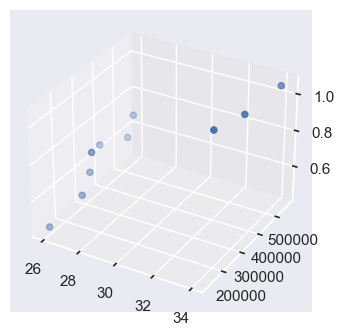

In [79]:
x=sorted(fifa['age'][:10])
y=sorted(fifa['wage_eur'][:10])
z=sorted(fifa['value_eur'][:10])


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x, y, z)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

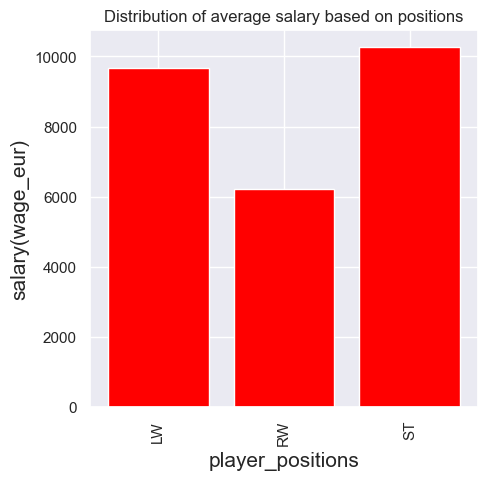

In [80]:
plt.figure(figsize=(5,5))
plt.bar(grouped.player_positions,grouped.wage_eur,color='red')
plt.title('Distribution of average salary based on positions')
plt.xlabel('player_positions',fontsize=15)
plt.ylabel('salary(wage_eur)',fontsize=15)
plt.xticks(rotation='vertical')

In [81]:
palyer_salary_wage_eur=fifa[['short_name','wage_eur']]

In [82]:
player_salary_wage_eur=palyer_salary_wage_eur.sort_values(by=['wage_eur'],ascending=False)

In [83]:
player_salary_wage_eur.head()

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000


In [84]:
corr= fifa1.corr()
corr

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
age,1.000000,0.091971,0.042317,-0.003344,-0.513687,-0.701054,0.109884,0.498440,-0.127888,-0.151242,-0.706991,-0.233212,-0.602940,-0.303076,-0.094658,-0.043159,-0.010848,-0.047769,0.168665,0.059296,-0.019247,-0.028624,-0.046682,-0.023476,-0.014827,-0.029590,-0.062951,-0.094239,0.131310,-0.047214,-0.023399,-0.098073,-0.051248,-0.032321,-0.014984,-0.057911,-0.201309,-0.240821,-0.183359,-0.091333,-0.143439,-0.072163,0.311785,-0.119914,0.107671,-0.047238,0.165919,0.237872,-0.087384,-0.194348,0.070227,0.045554,0.202270,0.160521,0.177287,-0.027280,-0.017730,-0.040396,-0.023900,-0.004138
height_cm,0.091971,1.000000,0.900429,-0.081026,-0.002932,-0.260039,-0.281334,0.070833,-0.258342,-0.597847,-0.229561,-0.348312,-0.015736,-0.460236,-0.620762,-0.570812,-0.559685,-0.612187,-0.109934,-0.272497,0.473317,0.479178,0.467793,0.473668,0.468834,0.475913,-0.641371,-0.591458,-0.101819,-0.572641,-0.560620,-0.646329,-0.592351,-0.529495,-0.427342,-0.584962,-0.733051,-0.557125,-0.801990,-0.385685,-0.890861,-0.358286,0.287367,-0.516633,0.620070,-0.587734,-0.050444,0.026754,-0.626006,-0.607494,-0.464300,-0.417810,0.048376,-0.029031,0.023860,0.459315,0.460697,0.458828,0.471007,0.455850
weight_kg,0.042317,0.900429,1.000000,-0.004605,0.093768,-0.180530,-0.234719,0.070974,-0.316529,-0.640033,-0.145930,-0.332777,0.035712,-0.400090,-0.586499,-0.580429,-0.571096,-0.606931,-0.118338,-0.270052,0.472491,0.482251,0.474125,0.473074,0.464370,0.479983,-0.657021,-0.604262,-0.081511,-0.591669,-0.571287,-0.632515,-0.616524,-0.560332,-0.427479,-0.600104,-0.667447,-0.489197,-0.773030,-0.292451,-0.812456,-0.355411,0.328180,-0.524935,0.672098,-0.595464,-0.064095,-0.009679,-0.639021,-0.616430,-0.487006,-0.415541,0.034226,-0.040142,0.014929,0.474253,0.475990,0.474956,0.485469,0.466124
overall,-0.003344,-0.081026,-0.004605,1.000000,0.754051,0.619223,0.656666,0.491050,0.253516,0.174560,0.616748,-0.114662,0.140822,0.109471,0.099676,0.110124,0.042014,0.066390,-0.199927,-0.012577,0.015572,0.024619,0.024448,0.017574,0.002935,0.023873,0.083360,0.159490,0.010504,0.072780,0.131052,0.109321,0.079855,0.098553,0.091997,0.078346,0.195568,0.232316,0.187884,0.626193,0.113549,0.202084,0.022766,0.028579,0.053860,0.112719,-0.082475,-0.233323,0.102503,0.194265,0.126864,0.276776,-0.280763,-0.234634,-0.254757,0.013627,0.033256,0.045243,0.056645,0.032430
potential,-0.513687,-0.002932,0.093768,0.754051,1.000000,0.759029,0.369218,0.060321,0.168854,0.107556,0.774854,-0.004282,0.311638,0.241720,0.024540,-0.013239,-0.073126,-0.034570,-0.256201,-0.087528,0.109133,0.119916,0.136139,0.112774,0.094253,0.122209,-0.028290,0.039219,-0.087420,-0.010417,0.000529,0.022089,-0.036608,-0.028656,-0.000402,-0.016810,0.143240,0.225835,0.101568,0.406760,0.037751,0.120413,-0.020956,-0.015912,0.110470,-0.011187,-0.136387,-0.297088,-0.005694,0.132912,-0.059315,0.078522,-0.321950,-0.245099,-0.272342,0.099791,0.111119,0.129381,0.144278,0.097131
value_eur,-0.701054,-0.260039,-0.180530,0.619223,0.759029,1.000000,0.424475,0.031972,0.418126,0.424668,0.981260,0.153461,0.467115

In [85]:
offense_player = fifa[['lw', 'rw', 'st']]
offense_player.head(15)

,lw,rw,st
0,93+2,93+2,89+2
1,89+3,89+3,91+3
2,90+3,90+3,84+3
3,0,0,0
4,89+3,89+3,83+3
5,87+3,87+3,82+3
6,0,0,0
7,67+3,67+3,69+3
8,84+3,84+3,77+3
9,88+3,88+3,84+3


### 3. Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 

<AxesSubplot:xlabel='value_eur', ylabel='overall'>

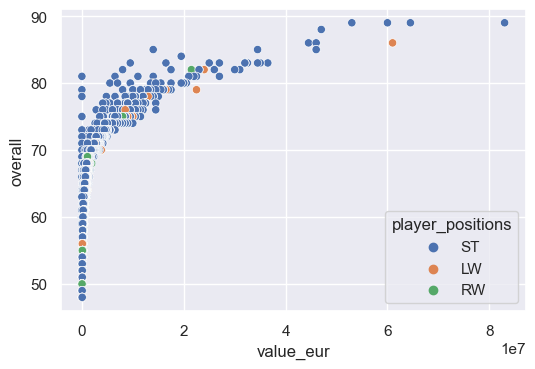

In [86]:
sns.scatterplot(x='value_eur', y='overall', hue='player_positions',data=fifa[fifa['player_positions'].isin(['ST','RW','LW'])])
# value_eur :  How much they are paid
# over all  :   Over all scores

### Therefore, while there may be a general trend of higher salaries for strikers compared to right-wingers and left-wingers, the data also show that individual performance and negotiation skills can play a significant role in determining player salaries. Additionally, it is important to consider the context of each team and league, as market demand and competition can also influence player salaries.

<AxesSubplot:xlabel='team_position', ylabel='count'>

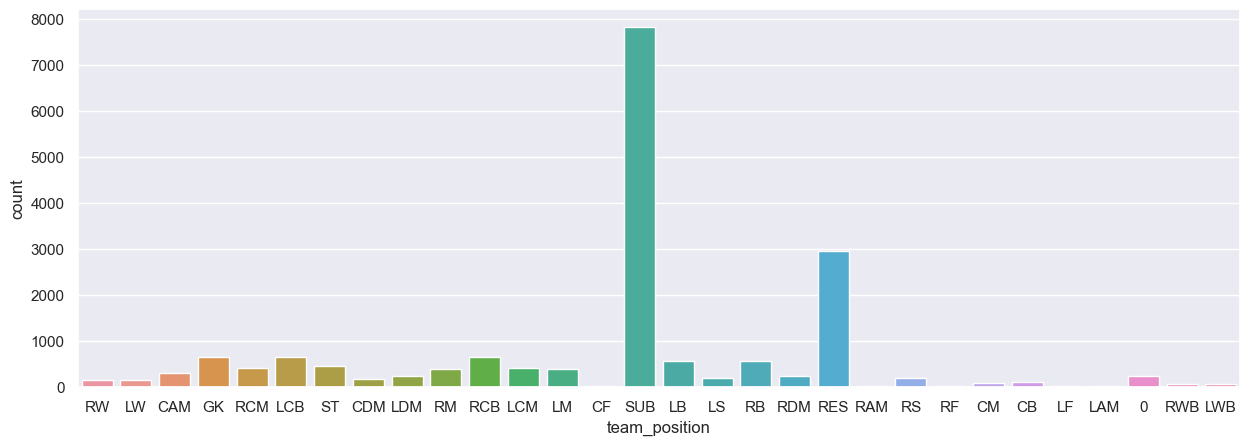

In [87]:
plt.figure(figsize=(15,5))
sns.countplot(data =fifa, x='team_position')

## Conclusion: 

### The analysis of the dataset provided insights into the soccer players' attributes and their relationship with their age and pas tion, it also identified the top countries producing footballers and the type of offersive players that get paid the most. The analysis can help soccer clubs and managers make informed decisions regarding player recruitment and salary negotiations.